<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Anomaly (outlier) Detection

Anomaly detection (also outlier detection) is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data.

[Wikipedia Link](https://en.wikipedia.org/wiki/Anomaly_detection)

Data science goals when doing anomaly detection:

* Looking for values or data points that might not truly represent the data. (errors, promotional values, etc.)
* Addressing these values to see what impact they may have on a particular model(s).
* Deciding on what to do with these values in your analysis or model building. (removing, replacing, altering, etc.)

#### Types of outlier detection we have gone over

* Box plots for single variables
* Clustering
    * K-Means
    * DB Scan

In [ ]:
#! pip install pyod
# python outlier detection modual library

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_excel("data/Superstore.xls")

In [3]:
df.head(10)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
7       8  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
8       9  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
9      10  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
5  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
6  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
7  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
8  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
9  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   
5       90032    West  FUR-FU-10001487        Furniture  Furnishings   
6       90032    West  OFF-AR-10002833  Office Supplies          Art   
7       90032    West  TEC-PH-10002275       Technology       Phones   
8       90032    West  OFF-BI-10003910  Office Supplies      Binders   
9       90032    West  OFF-AP-10002892  Office Supplies   Appliances   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   
5  Eldon Expressions Wood and Plastic Desk Access...   48.8600         7   
6                                         Newell 322    7.2800         4   
7                     Mitel 5320 IP Phone VoIP phone  907.1520         6   
8  DXL Angle-View Binders with Locking Rings by S...   18.5040         3   
9                   Belkin F5C206VTEL 6 Outlet Surge  114.9000         5   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  
5      0.00   14.1694  
6      0.00    1.9656  
7      0.20   90.7152  
8      0.20    5.7825  
9      0.00   34.4700  

[10 rows x 21 columns]

Let's take a look at the sales column to see some descriptive statistics on our sales data

In [4]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

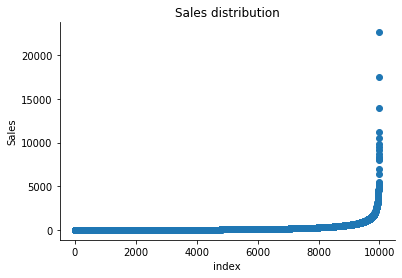

In [5]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

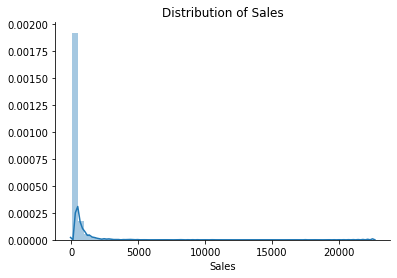

In [6]:
# skewed to the right
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [7]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


Profit Distribution

In [9]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

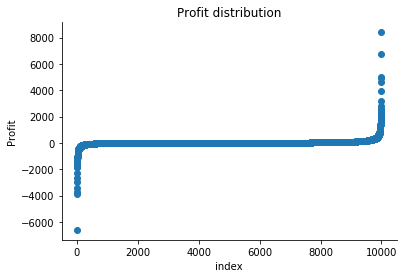

In [10]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

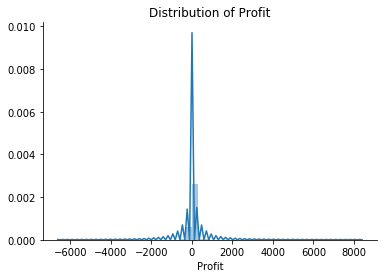

In [11]:
# centered around zero skewed slightly toward right
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [12]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


## Isolation Forest

Part of the machine learning family in Sci-Kit Learn, an Isolation Forest is an unsupervised learning algorithm that identifies anomalies in the data. Based on the decision tree structure, it isolates outliers by randomly selecting features from a given set of data then split the value between the maximum and minimum values of that feature. The random selection of the data point allows the tree to distinguish which points of the data require less splits (outliers) and which points of the data are natural fits.

Other ways of anomaly detection create an inital profile of what is normal first, then see what deviates from the normal profile. The random partitions of data allow the point to be considered normal or outliers as the outliers have smaller lengths in their tree. Length meaning the amount of branches that need to be created.



### Anomaly Detection on Sales

In [25]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

In [26]:
print(xx)
print(anomaly_score)
print(outlier)

[[4.44000000e-01]
 [2.70938937e+00]
 [4.97477875e+00]
 ...
 [2.26339492e+04]
 [2.26362146e+04]
 [2.26384800e+04]]
[ 0.01512258  0.06011476  0.09012133 ... -0.36111641 -0.36111641
 -0.36111641]
[ 1  1  1 ... -1 -1 -1]


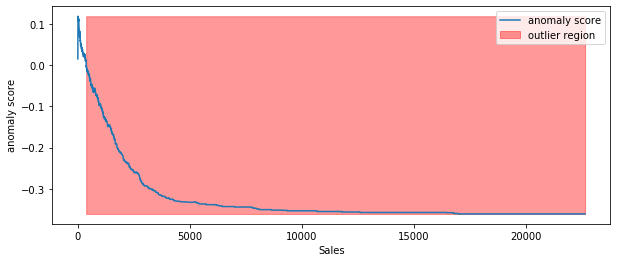

In [27]:
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

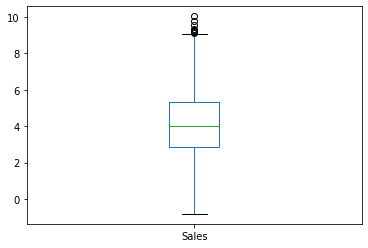

In [28]:
np.log(df.Sales).plot(kind='box')

In [29]:
sum(outlier==1)

165

In [16]:
df.loc[10]

Row ID                                                 11
Order ID                                   CA-2014-115812
Order Date                            2014-06-09 00:00:00
Ship Date                             2014-06-14 00:00:00
Ship Mode                                  Standard Class
Customer ID                                      BH-11710
Customer Name                             Brosina Hoffman
Segment                                          Consumer
Country                                     United States
City                                          Los Angeles
State                                          California
Postal Code                                         90032
Region                                               West
Product ID                                FUR-TA-10001539
Category                                        Furniture
Sub-Category                                       Tables
Product Name     Chromcraft Rectangular Conference Tables
Sales         

### Anomaly detection on Profit

In [31]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Profit'].values.reshape(-1, 1))
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

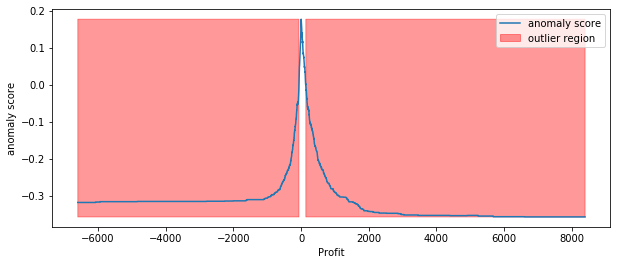

In [32]:
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [33]:
sum(outlier==1)

135

There were two regions that the data has low probability to appear: one on the left side of the distribution, another one on the right side of the distribution.

In [34]:
df.loc[df['Profit'] < -100].head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3        4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
14      15  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   
27      28  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
36      37  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   
72      73  US-2015-134026 2015-04-26 2015-05-02  Standard Class    JE-15745   

      Customer Name      Segment        Country             City  ...  \
3    Sean O'Donnell     Consumer  United States  Fort Lauderdale  ...   
14    Harold Pawlan  Home Office  United States       Fort Worth  ...   
27  Tracy Blumstein     Consumer  United States     Philadelphia  ...   
36        Gene Hale    Corporate  United States       Richardson  ...   
72       Joel Eaton     Consumer  United States          Memphis  ...   

   Postal Code   Region       Product ID         Category Sub-Category  \
3        33311    South  FUR-TA-10000577        Furniture       Tables   
14       76106  Central  OFF-AP-10002311  Office Supplies   Appliances   
27       19140     East  FUR-BO-10004834        Furniture    Bookcases   
36       75080  Central  FUR-FU-10003664        Furniture  Furnishings   
72       38109    South  FUR-CH-10000513        Furniture       Chairs   

                                         Product Name      Sales  Quantity  \
3       Bretford CR4500 Series Slim Rectangular Table   957.5775         5   
14  Holmes Replacement Filter for HEPA Air Cleaner...    68.8100         5   
27  Riverside Palais Royal Lawyers Bookcase, Royal...  3083.4300         7   
36  Electrix Architect's Clamp-On Swing Arm Lamp, ...   190.9200         5   
72                  High-Back Leather Manager's Chair   831.9360         8   

    Discount     Profit  
3       0.45  -383.0310  
14      0.80  -123.8580  
27      0.50 -1665.0522  
36      0.60  -147.9630  
72      0.20  -114.3912  

[5 rows x 21 columns]

In [35]:
df.iloc[3]

Row ID                                                       4
Order ID                                        US-2015-108966
Order Date                                 2015-10-11 00:00:00
Ship Date                                  2015-10-18 00:00:00
Ship Mode                                       Standard Class
Customer ID                                           SO-20335
Customer Name                                   Sean O'Donnell
Segment                                               Consumer
Country                                          United States
City                                           Fort Lauderdale
State                                                  Florida
Postal Code                                              33311
Region                                                   South
Product ID                                     FUR-TA-10000577
Category                                             Furniture
Sub-Category                                           

In [36]:
df.loc[df['Profit'] > 200].head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1         2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
24       25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   
54       55  CA-2016-105816 2016-12-11 2016-12-17  Standard Class    JM-15265   
144     145  CA-2017-155376 2017-12-22 2017-12-27  Standard Class    SG-20080   
149     150  CA-2016-114489 2016-12-05 2016-12-09  Standard Class    JE-16165   

      Customer Name    Segment        Country           City  ... Postal Code  \
1       Claire Gute   Consumer  United States      Henderson  ...       42420   
24      Emily Burns   Consumer  United States           Orem  ...       84057   
54   Janet Molinari  Corporate  United States  New York City  ...       10024   
144  Sandra Glassco   Consumer  United States   Independence  ...       64055   
149  Justin Ellison  Corporate  United States       Franklin  ...       53132   

      Region       Product ID         Category Sub-Category  \
1      South  FUR-CH-10000454        Furniture       Chairs   
24      West  FUR-TA-10000577        Furniture       Tables   
54      East  TEC-PH-10002447       Technology       Phones   
144  Central  OFF-AP-10001058  Office Supplies   Appliances   
149  Central  FUR-CH-10000454        Furniture       Chairs   

                                          Product Name    Sales  Quantity  \
1    Hon Deluxe Fabric Upholstered Stacking Chairs,...   731.94         3   
24       Bretford CR4500 Series Slim Rectangular Table  1044.63         3   
54                    AT&T CL83451 4-Handset Telephone  1029.95         5   
144  Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...   839.43         3   
149  Hon Deluxe Fabric Upholstered Stacking Chairs,...  1951.84         8   

     Discount    Profit  
1         0.0  219.5820  
24        0.0  240.2649  
54        0.0  298.6855  
144       0.0  218.2518  
149       0.0  585.5520  

[5 rows x 21 columns]

In [37]:
df.iloc[1]

Row ID                                                           2
Order ID                                            CA-2016-152156
Order Date                                     2016-11-08 00:00:00
Ship Date                                      2016-11-11 00:00:00
Ship Mode                                             Second Class
Customer ID                                               CG-12520
Customer Name                                          Claire Gute
Segment                                                   Consumer
Country                                              United States
City                                                     Henderson
State                                                     Kentucky
Postal Code                                                  42420
Region                                                       South
Product ID                                         FUR-CH-10000454
Category                                                 Furni

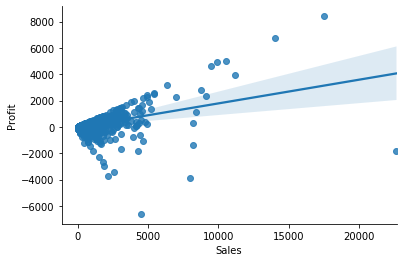

In [38]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [39]:
cols = ['Sales', 'Profit']
df[cols].head()

Sales    Profit
0  261.9600   41.9136
1  731.9400  219.5820
2   14.6200    6.8714
3  957.5775 -383.0310
4   22.3680    2.5164

## Multivariate Anomaly Detection

In most cases you will need to use more than one feature to look for anomalies. For this purpose, we are going to build a anomaly detection that is comprised of several models

In [48]:
minmax = MinMaxScaler(feature_range=(0, 1))
df[['Sales','Profit']] = minmax.fit_transform(df[['Sales','Profit']])
print(df[['Sales','Profit']].head())

X1 = df['Sales'].values.reshape(-1,1)
X2 = df['Profit'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)
X

      Sales    Profit
0  0.011552  0.442794
1  0.032313  0.454639
2  0.000626  0.440458
3  0.042280  0.414464
4  0.000968  0.440168


array([[0.01155206, 0.44279413],
       [0.0323127 , 0.45463873],
       [0.0006262 , 0.44045798],
       ...,
       [0.01140258, 0.44129277],
       [0.00128792, 0.44088789],
       [0.0107216 , 0.4448631 ]])

In [41]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IForest(contamination=outliers_fraction,random_state=0)
clf.fit(X)

# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

OUTLIERS:  100 INLIERS:  9894


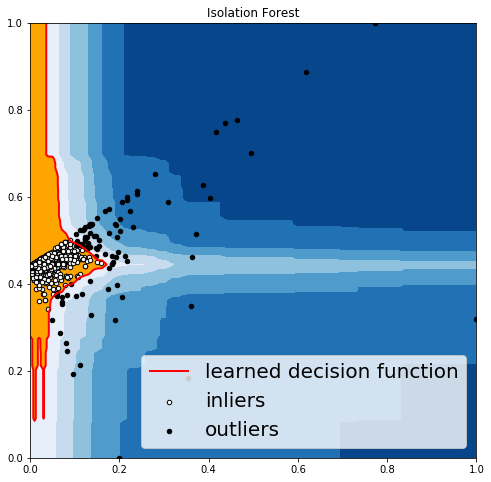

In [42]:
 plt.figure(figsize=(8, 8))
# threshold value to consider a datapoint inlier or outlier
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();

OUTLIERS:  91 INLIERS:  9903


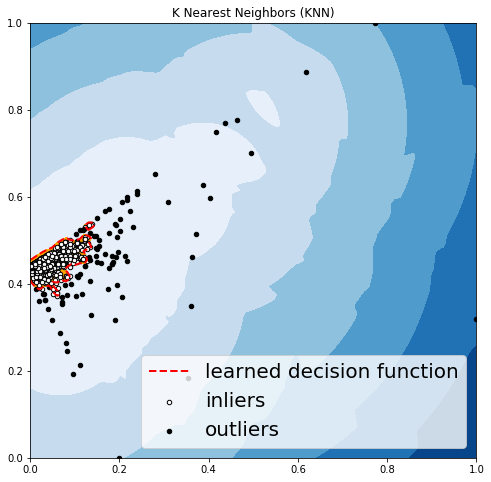

In [43]:
outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
# predict raw anomaly score
scores_pred = clf.decision_function(X) * -1
        
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
# copy of dataframe
df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)
        
# threshold value to consider a datapoint inlier or outlier
threshold = percentile(scores_pred, 100 * outliers_fraction)
        
# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
# fill blue map colormap from minimum anomaly score to threshold value
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
# draw red contour line where anomaly score is equal to thresold
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')  
   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('K Nearest Neighbors (KNN)')
plt.show();

In [44]:
df1.loc[df1['outlier'] == 1].tail(10)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
9231    9232  CA-2014-148383 2014-12-27 2014-12-31  Standard Class   
9270    9271  US-2017-102183 2017-08-21 2017-08-28  Standard Class   
9412    9413  CA-2015-164777 2015-01-27 2015-01-29     First Class   
9425    9426  CA-2014-116246 2014-09-12 2014-09-17    Second Class   
9639    9640  CA-2015-116638 2015-01-28 2015-01-31    Second Class   
9649    9650  CA-2016-107104 2016-11-26 2016-11-30  Standard Class   
9660    9661  CA-2016-160717 2016-06-06 2016-06-11  Standard Class   
9741    9742  CA-2015-117086 2015-11-08 2015-11-12  Standard Class   
9774    9775  CA-2014-169019 2014-07-26 2014-07-30  Standard Class   
9857    9858  CA-2015-164301 2015-03-26 2015-03-30  Standard Class   

     Customer ID        Customer Name      Segment        Country  \
9231    RP-19390         Resi Pölking     Consumer  United States   
9270    PK-19075            Pete Kriz     Consumer  United States   
9412    SC-20305     Sean Christensen     Consumer  United States   
9425    LW-17215           Luke Weiss     Consumer  United States   
9639    JH-15985          Joseph Holt     Consumer  United States   
9649    MS-17365  Maribeth Schnelling     Consumer  United States   
9660    ME-17320        Maria Etezadi  Home Office  United States   
9741    QJ-19255         Quincy Jones    Corporate  United States   
9774    LF-17185          Luke Foster     Consumer  United States   
9857    EB-13840        Ellis Ballard    Corporate  United States   

               City  ...   Region       Product ID         Category  \
9231        Phoenix  ...     West  OFF-BI-10003650  Office Supplies   
9270  New York City  ...     East  OFF-BI-10001359  Office Supplies   
9412    Los Angeles  ...     West  FUR-CH-10002024        Furniture   
9425  New York City  ...     East  FUR-CH-10002024        Furniture   
9639        Concord  ...    South  FUR-TA-10000198        Furniture   
9649    Los Angeles  ...     West  FUR-BO-10002213        Furniture   
9660  Santa Barbara  ...     West  TEC-PH-10001459       Technology   
9741     Burlington  ...     East  FUR-BO-10004834        Furniture   
9774    San Antonio  ...  Central  OFF-BI-10004995  Office Supplies   
9857        Seattle  ...     West  FUR-TA-10001889        Furniture   

     Sub-Category                                       Product Name  \
9231      Binders          GBC DocuBind 300 Electric Binding Machine   
9270      Binders         GBC DocuBind TL300 Electric Binding System   
9412       Chairs       HON 5400 Series Task Chairs for Big and Tall   
9425       Chairs       HON 5400 Series Task Chairs for Big and Tall   
9639       Tables  Chromcraft Bull-Nose Wood Oval Conference Tabl...   
9649    Bookcases              DMI Eclipse Executive Suite Bookcases   
9660       Phones                            Samsung Galaxy Mega 6.3   
9741    Bookcases  Riverside Palais Royal Lawyers Bookcase, Royal...   
9774      Binders          GBC DocuBind P400 Electric Binding System   
9857       Tables  Bush Advantage Collection Racetrack Conference...   

         Sales Quantity  Discount    Profit  outlier  
9231  0.041802        6      0.70  0.393714        1  
9270  0.190171        6      0.20  0.536875        1  
9412  0.123839        5      0.20  0.440000        1  
9425  0.167190        6      0.10  0.468039        1  
9639  0.189822       13      0.40  0.315845        1  
9649  0.150464        8      0.15  0.450687        1  
9660  0.133558        9      0.20  0.455120        1  
9741  0.194560        5      0.00  0.507542        1  
9774  0.096172        8      0.80  0.193206        1  
9857  0.149891        8      0.00  0.480724        1  

[10 rows x 22 columns]

In [45]:
# 80% discount
df.iloc[1995]

Row ID                                                        1996
Order ID                                            US-2017-147221
Order Date                                     2017-12-02 00:00:00
Ship Date                                      2017-12-04 00:00:00
Ship Mode                                             Second Class
Customer ID                                               JS-16030
Customer Name                                            Joy Smith
Segment                                                   Consumer
Country                                              United States
City                                                       Houston
State                                                        Texas
Postal Code                                                  77036
Region                                                     Central
Product ID                                         OFF-AP-10002534
Category                                           Office Supp

In [46]:
#Executive bookcase
df.iloc[9649]

Row ID                                            9650
Order ID                                CA-2016-107104
Order Date                         2016-11-26 00:00:00
Ship Date                          2016-11-30 00:00:00
Ship Mode                               Standard Class
Customer ID                                   MS-17365
Customer Name                      Maribeth Schnelling
Segment                                       Consumer
Country                                  United States
City                                       Los Angeles
State                                       California
Postal Code                                      90045
Region                                            West
Product ID                             FUR-BO-10002213
Category                                     Furniture
Sub-Category                                 Bookcases
Product Name     DMI Eclipse Executive Suite Bookcases
Sales                                         0.150464
Quantity  

In [47]:
df.iloc[9270]

Row ID                                                 9271
Order ID                                     US-2017-102183
Order Date                              2017-08-21 00:00:00
Ship Date                               2017-08-28 00:00:00
Ship Mode                                    Standard Class
Customer ID                                        PK-19075
Customer Name                                     Pete Kriz
Segment                                            Consumer
Country                                       United States
City                                          New York City
State                                              New York
Postal Code                                           10035
Region                                                 East
Product ID                                  OFF-BI-10001359
Category                                    Office Supplies
Sub-Category                                        Binders
Product Name     GBC DocuBind TL300 Elec



# Addressing Overfitting

<a id="learning-objectives"></a>
### Learning Objectives
- Recall what overfitting is
- Getting more data
- Feature Selection
- Feature Importance

We've already discussed several ways to address overfitting. In this notebook, we'll recap & formalize.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm  # see progress bar for particular cell's calculation

In [50]:
%matplotlib inline

Increasing model complexity can decrease bias but will eventually lead to overfitting. This lesson is about what to do when your model is overfitting.

## Getting More Data

Remember the Ames (Iowa) housing data?

Getting more data is the surest way to reduce overfitting.

In [51]:
ames_df = pd.read_csv('data/ames_train.csv')
# Dropping `OverallQual` because it is not always available
ames_df = ames_df.drop(['Id', 'OverallQual'], axis='columns')

In [52]:
ames_df.shape

(1460, 79)

In [53]:
ames_df.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0      2    2008        WD         Normal    208500  
1       0      5    2007        WD         Normal    181500  
2       0      9    2008        WD         Normal    223500  
3       0      2    2006        WD        Abnorml    140000  
4       0     12    2008        WD         Normal    250000  

[5 rows x 79 columns]

In [54]:
# Make a function to calculate training score on the whole dataset
# and cross-validated test score.
from sklearn.model_selection import cross_val_score, KFold

def my_cv_score(estimator, X, y, n_splits=10):
    estimator.fit(X, y)
    train_score = estimator.score(X, y)
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    test_score = cross_val_score(estimator, X, y, cv=kf).mean()
    
    return print("Train Score: ", train_score, "Test Score: ", test_score)

In [55]:
# Use 10-fold cross-validation to calculate training-set and test-set scores using 200 rows of data
from sklearn.linear_model import LinearRegression

ames_df_num = ames_df.select_dtypes(['int64', 'float64']).dropna(axis='columns')
ames_small = ames_df_num.sample(100, random_state=42)

target_col = 'SalePrice'

X_small = ames_small.drop(target_col, axis='columns')
y_small = ames_small.loc[:, target_col]

lr = LinearRegression()
my_cv_score(lr, X_small, y_small)

Train Score:  0.8958123466965696 Test Score:  0.6054486621426289


In [56]:
# Use 10-fold cross-validation to calculate training-set and test-set scores using all the data
X = ames_df_num.drop(target_col, axis='columns')
y = ames_df_num.loc[:, target_col]

my_cv_score(lr, X, y)

Train Score:  0.7788559155673487 Test Score:  0.7307411610581293


**When collecting more data is not too expensive, it should be your first resort to address overfitting.**

## Feature Selection

### Why Select Features?

Often it is best not to use all of your features, for at least two reasons:

1. Using more features makes your model harder to interpret.
2. Removing features may improve overall predictive performance by reducing overfitting.

These problems become particularly acute when you start using feature engineering to generate derived features.

### Adding Features in Order of Importance

Here is one recipe for optimizing a model through feature selection:

1. Rank features according to some measure of importance *calculated on the training set*.
2. Add features to your model in the order given by that ranking, fitting on the training set and measuring predictive performance on the test set each time.
3. Choose the set of features that gives the best predictive performance.

It is inappropriate to use the test set in your calculation of feature importance because you will not have the benefit of information about feature importance for the data the model sees when you deploy it.

When using cross-validation, you need to calculate your measure of importance on the training set *for each fold*. With this approach, you can have different features in your model for different folds. You should think of cross-validation in this case as estimating the performance of your entire *model-generating procedure*, rather than the particular model that it produces.

### Example: Using Random Forest Feature Importances

Here we will fit a random forest and use the feature importances as our measure of predictive value.

Calculating random forest feature importances is computationally expensive, so we want to do it once for each fold, rather than once for each fold and each number of features.

**Warning:** the code is about to get a little complicated.

In [ ]:
! pip install tqdm

#### Optional progress bar
(Optional) Install `tqdm`, a progress bar, with:

* `pip install tqdm`
* `conda install -c conda-forge tqdm` (not recommended)

For more info on installation, visit the package [repo](https://github.com/tqdm/tqdm#latest-conda-release)

In [62]:
from time import sleep
from tqdm import tqdm

for _ in tqdm(range(10)):
    sleep(1)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.00s/it]


In [66]:
# Make a function to calculate cross-validation scores by number of features
def my_cv_score_by_num_features(estimator, X, y, rank_feature_func, n_splits=10):
    train_scores = []
    test_scores = []
    
    kf = KFold(n_splits=n_splits, shuffle=True)
    for train_rows, test_rows in tqdm(kf.split(X, y), total=n_splits):
        X_train = X.iloc[train_rows, :]
        X_test = X.iloc[test_rows, :]
        y_train = y.iloc[train_rows]
        y_test = y.iloc[test_rows]
        
        ranked_features = rank_feature_func(X_train, y_train)
        
        train_scores_fold = []
        test_scores_fold = []
        
        num_features_range = range(1, len(ranked_features) + 1)
        for num_features in num_features_range:
            feature_cols = ranked_features[:num_features]
            X_train_k = X_train.loc[:, feature_cols]
            X_test_k = X_test.loc[:, feature_cols]
            
            estimator.fit(X_train_k, y_train)
            train_scores_fold.append(estimator.score(X_train_k, y_train))
            test_scores_fold.append(estimator.score(X_test_k, y_test))
        
        train_scores.append(train_scores_fold)
        test_scores.append(test_scores_fold)
    
    train_scores = np.array(train_scores).T.mean(axis=1)
    test_scores = np.array(test_scores).T.mean(axis=1)
    return pd.DataFrame({'num_features': num_features_range,
                         'train': train_scores,
                         'test': test_scores
                        })

In [67]:
# Make a function to rank features according to estimator feature importances
def rank_features_by_estimator_importances(X, y, estimator):
    estimator.fit(X, y)
    feature_ranks_worst_first = estimator.feature_importances_.argsort()
    feature_ranks_first_worst = feature_ranks_worst_first[::-1]
    ranked_features = X.columns[feature_ranks_first_worst]
    return ranked_features

In [68]:
# Create a more specialized function to rank features according to random
# forest regressor feature importances
from functools import partial
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(100)
rank_features_by_rfr_importances = partial(rank_features_by_estimator_importances, estimator=rfr)

In [69]:
# Get scores by number of features for a linear regression model
# on our sampled Ames dataset, adding features in order of
# decreasing random forest regressor importances.
lr = LinearRegression()

scores = my_cv_score_by_num_features(
    estimator=lr,
    X=X_small,
    y=y_small,
    rank_feature_func=rank_features_by_rfr_importances
)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.14it/s]


In [70]:
# Look at the scores
scores.head()

num_features     train      test
0             1  0.563739  0.332799
1             2  0.680645  0.611393
2             3  0.752654  0.629611
3             4  0.788553  0.659274
4             5  0.811730  0.694599

In [71]:
rfr.fit(X_small, y_small)
sorted(zip(rfr.feature_importances_, X_small.columns))[::-1]

[(0.3750948550380111, 'GrLivArea'),
 (0.1224484679960642, 'BsmtFinSF1'),
 (0.11554466609027844, 'YearBuilt'),
 (0.09305202278311198, 'GarageArea'),
 (0.0741612762534839, 'GarageCars'),
 (0.0452201048986959, 'TotalBsmtSF'),
 (0.03059573978472041, 'OpenPorchSF'),
 (0.026057265249060418, '1stFlrSF'),
 (0.024770072823963124, 'LotArea'),
 (0.02257312902930866, 'YearRemodAdd'),
 (0.01815118229616452, 'FullBath'),
 (0.007344303535639795, 'OverallCond'),
 (0.007005044990268006, 'MoSold'),
 (0.006734330162175704, 'TotRmsAbvGrd'),
 (0.006492254179304377, 'WoodDeckSF'),
 (0.006002895925499103, 'BsmtUnfSF'),
 (0.0029125609837204794, 'BedroomAbvGr'),
 (0.0026018831350966124, 'MSSubClass'),
 (0.002582882930883599, 'Fireplaces'),
 (0.0025740859576967737, 'YrSold'),
 (0.0025116843399116944, '2ndFlrSF'),
 (0.0022792453006977675, 'HalfBath'),
 (0.0007178932164697478, 'BsmtFinSF2'),
 (0.0005606541550432425, 'BsmtHalfBath'),
 (0.0005567900976168642, 'BsmtFullBath'),
 (0.00041243697375443165, 'KitchenAbvGr

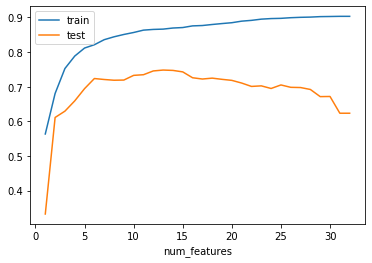

In [72]:
# Plot scores
ax = scores.plot(x='num_features')

In [73]:
# Look at scores in descending order, identify
# the number of features that worked best.
scores.sort_values('test', ascending=False)

num_features     train      test
12            13  0.866325  0.748174
13            14  0.869475  0.747169
11            12  0.865432  0.745644
14            15  0.870873  0.742908
10            11  0.863399  0.734741
9             10  0.856598  0.732874
15            16  0.875646  0.725978
17            18  0.879677  0.724875
5              6  0.821264  0.723735
16            17  0.876693  0.722310
18            19  0.882362  0.721408
6              7  0.835815  0.720956
8              9  0.850892  0.719337
7              8  0.844150  0.718814
19            20  0.884817  0.718427
20            21  0.889296  0.710686
24            25  0.897425  0.705219
22            23  0.895099  0.702585
21            22  0.891589  0.700958
25            26  0.899268  0.698375
26            27  0.900369  0.697747
23            24  0.896762  0.695033
4              5  0.811730  0.694599
27            28  0.901016  0.692160
29            30  0.902748  0.671943
28            29  0.902365  0.671555
3              4  0.788553  0.659274
2              3  0.752654  0.629611
30            31  0.903206  0.623621
31            32  0.903206  0.623621
1              2  0.680645  0.611393
0              1  0.563739  0.332799

*Curious?* See scikit-learn's [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) for some alernatives to random forest feature importances.

### Limitations of Adding Features in Order of Importance

##### Result May Not Be Optimal

Picking an "all-star team" of features based on their individual performances can miss combinations of features that work better overall because they complement each other well.

For instance, if you had temperature in Celsius and temperature in Fahrenheit in your data set and used correlation with the target as your measure of importance, this approach would use both of those features without regard for the fact that they are redundant. Using random forest feature importances addresses this problem to some extent.

##### Can Be Slow

This approach requires fitting many times, so it can be quite slow, especially when you combine it with ensembling and cross-validation.

### Alternative Approaches to Feature Selection

- Start with all of the features and gradually remove them.
- Add/remove one feature at a time, each time testing how much the change helps or hurts. Choose the feature that helps the most at each stage, stopping when you cannot find one that helps substantially.
- Choose the top $k$ features based on a measure of feature importance without fitting a model on each set of features.
- Try all combinations of features. (This approach quickly becomes computationally infeasible.)
- Try random combinations of features.